# Installing bnlp toolkit and bnltk library

In [10]:
pip install bnlp_toolkit

In [11]:
pip install bnltk

In [12]:
pip install -U bnlp_toolkit

# Importing Library

In [29]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer
from pandas import read_excel
import re
from re import sub
import multiprocessing

import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D

from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Read dataset

In [30]:
from google.colab import drive
#drive.mount('/content/drive')
dataset=pd.read_csv('/content/Covid vaccine data.csv')


In [31]:
dataset.shape

(418, 2)

Non-urgent: 21900.00%, Urgent: 19900.00%


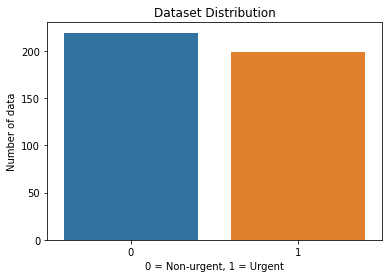

In [16]:
target_vc = dataset["Polarity"].value_counts(normalize=False)
print("Non-urgent: {:.2%}, Urgent: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Non-urgent, 1 = Urgent")
plt.ylabel("Number of data")
plt.show()

# Data Preprocessing

In [32]:
import re
corpus=[]
max=0
for i in range(0,418):
    review = re.sub('[\!"#$%&()*,./:;<=>?@[\\]^`{|}~\t\n।+-]', ' ', dataset['Text'][i])
    review=review.replace('_',' ')
    review=review.replace('ঃ',' ')
    review = re.sub('[a-zA-Z0-9]+', ' ', review)    
    review = re.sub('[''````£|¢|Ñ/=EROero।!“’<>‘॥”‰\'🤓⌚🤰🥺⚽️✌�￰🥀🤣🤡🤗🤐🤦🤔⏩⏹￰]', ' ', review)               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations 
                           u"\\U0001f90f" 
                           u"\\U0001f9cf"
                           u"\U0001fa78"  
                           "]+", flags=re.UNICODE)
    review=emoji_pattern.sub(r'', review)
    #review=str(review)
    #review=review.split()
    '''review=review.replace('A', 'এ')
    review=review.replace('B', 'বি')
    review=review.replace('AB', 'এবি')
    review=review.replace('O', 'ও')
    review=review.replace('+','পজিটিভ')
    review=review.replace('-','নেগেটিভ')'''
    review=review.lower()
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    #review=str(review)
    #review=review.split()
    review=' '.join(review)
    corpus.append(review)
    if(max<len(review)):
      max=len(review)
print(max)


384


In [33]:
corpus

['ম্যাডাম টিকাটা ভারতে সম্পকে জানেনই একটু ব',
 'ভ্যাকসিন নেয়ার পরও বাবার করোনা পজেটিভ এসেছে ছোট ছেলের করোনা বাবার হালকা জ্বর গলা ব্যাথা অসুস্থ হননি',
 '১ম ডোজ নেয়ার দের মাস আজোও ২য় ডোজ নেবার এম',
 'আড়াই মাস হয়ে দ্বিতীয় ডোজ টিকা টাই এখনো পেলাম বুস্টার ডোজ টিকা হয়ে গ',
 '৫ লোক কিভাবে পাবে টিকা রোহিঙ্গাদের টিকা',
 'বাংলাদেশ সবসময় ভারতের নির্ভর কারনে বিপদ উদাহারন পেঁয়াজ টিকা',
 'টিকাদান রেজিস্ট্রেশন বিড়ম্বনা যেইদিন ডেট পড়বে অইদিন টিকা গ্রহণ পারবেন',
 'কারা ভ্যাক্সিনেশন কারা বর্তমানে টিকা দিচ্ছেন ইউনিসেফ জানেন',
 'হাস্পাতালগুলাতে ভ্যাক্সিন দেয়ার আলাদা স্থান নির্ধারণ হয়েছে কারনে বিড়ম্বনা ছাড়াই টিকাদান কর্মসূচি সম্পন্ন হ',
 'রোগ প্রতিরোধ ক্ষমতা ভাল শরীরে তাদেরও টিকা নেয়া জরুরী কোভিড সংক্রমণ রোধে সবাই ভ্যাক্সিনেটেড শঙ্কামুক্ত হবো',
 'মূহুর্তে টিকার মজুদ খুবই দরক',
 'আশ্চর্য ফরমে কোথাও লেখা বুস্টার ডোজ লেখা ৩য় ডোজ গ্রহীতা বুঝবে',
 'ফাইযার ভ্যাক্সিন পেয়েছি আলহামদুলিল্লাহ কেন্দ্রে ফাইযারের পর্যাপ্ত সরবরাহ',
 'সিদ্ধান্ত মাইরি টিকার টাকা অগ্রীম দেশ টিকা দেয়া বন্ধ রেখেছে পাঠাচ্ছি রেমডিসিভির বলুন হ্

# Feature Selection

In [36]:
# TF-IDF process
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X= cv.fit_transform(corpus).toarray()
y= dataset.iloc[:, 1].values
#print(X)
#print(y)

#SVM with 80:20 spliting

In [35]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
# Fitting SVC to the training set
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [22]:
#predicting the Test set results
y_pred=classifier.predict(X_test)




Confusion Matrix for PassiveAggressiveClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f852fd9fad0>)

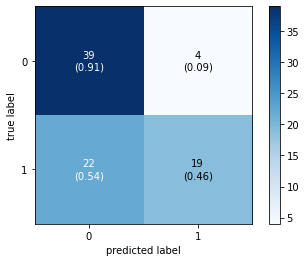

In [23]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#print(cm)
from mlxtend.plotting import plot_confusion_matrix
print("Confusion Matrix for PassiveAggressiveClassifier")
plot_confusion_matrix(conf_mat=cm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [40]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy %.3f'%accuracy)

from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)


Accuracy 0.690
precision 0.826
Recall 0.463
f1_score 0.594


# SVM with 10-fold cross validation

In [39]:
#Applying 10-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statistics import *
# prepare the cross-validation procedure
cv = KFold(n_splits=10,shuffle=True,random_state=0)
# evaluate model
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv)
recall = cross_val_score(classifier, X, y, scoring='recall', cv=cv)
precision = cross_val_score(classifier, X, y, scoring='precision', cv=cv)
f1 = cross_val_score(classifier, X, y, scoring='f1', cv=cv)
# report performance
print('Accuracy %.3f'%mean(scores))
print('precision %.3f'%np.mean(precision))
print('Recall %.3f'%np.mean(recall))
print('f1_score %.3f'%np.mean(f1))

Accuracy 0.727
precision 0.767
Recall 0.613
f1_score 0.672
